Titanic dataset can be found in the seaborn module.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
titanic=sns.load_dataset('titanic')

In [44]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [45]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [46]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
titanic.shape

(891, 15)

In [48]:
titanic.duplicated().sum()

np.int64(107)

In [49]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [50]:
(titanic.isnull().sum()/len(titanic))*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

As we see Deck contaion the massive ammount of null value.

<Axes: >

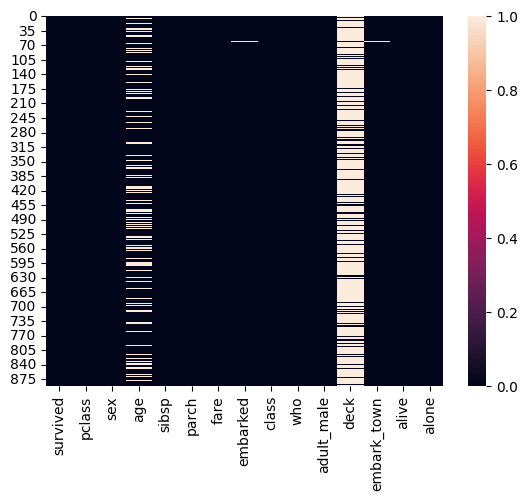

In [51]:
sns.heatmap(titanic.isnull())

Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


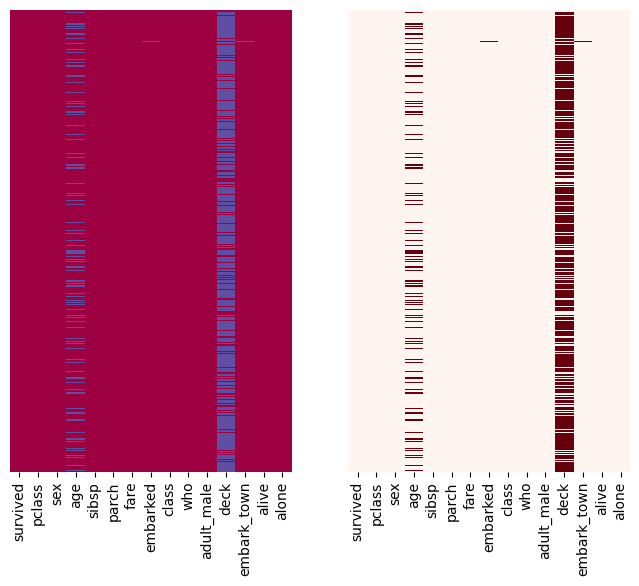

In [52]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
print(sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap="Spectral"))
plt.subplot(1,2,2)
print(sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap="Reds"))

Fill the null Values

In [53]:
titanic["deck"].value_counts()


deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

# Impute null values

### As we see age contain numerical type data and deck contaion categorical type data.

##### Fill missing values using mean and mode.

The most basic method to fill the missing values is, fill the numeric values by mean and categorical values bu mode. 

In [54]:
# Make a copy of data so the original data will remain same.
titanic_filled=titanic.copy()        # to fill the null values by basic method.
titanic_filled_2=titanic.copy()      # to fill the null values by intermediate method using all collumns at the same time.
titanic_filled_3 = titanic.copy()    # By using ML algorithms to find null values(Advance process).

In [55]:
titanic_filled

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [56]:
titanic_filled.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [57]:
titanic_filled["age"]=titanic_filled["age"].fillna(round(titanic_filled["age"].mean()))

In [58]:
titanic_filled.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

fill the missing deck values using mode().. we can also find the missing values using machine learning(Decssion Tree)

In [59]:
titanic_filled["deck"]=titanic_filled["deck"].fillna(titanic_filled["deck"].mode()[0])

In [60]:
titanic_filled.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [61]:
titanic_filled["embark_town"]=titanic_filled["embark_town"].fillna(titanic_filled["embark_town"].mode()[0])

In [62]:
titanic_filled.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Titanic_filled_2

Fill null valus for all columns as once.

In [63]:
titanic_filled_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [64]:
titanic_filled_2.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [65]:
numerical_col=titanic_filled_2.select_dtypes(include=["number"]).columns  # select columns which has numeric data.

categorical_col= titanic_filled_2.select_dtypes(exclude=["number"]).columns # select columns which doesnt have numeric data.

In [66]:
numerical_col

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [67]:
categorical_col

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

fill the null values

In [68]:
for col in numerical_col:
    titanic_filled_2[col]=titanic_filled_2[col].fillna(round(titanic_filled_2[col].mean()))

for col in categorical_col:
    titanic_filled_2[col]=titanic_filled_2[col].fillna(titanic_filled_2[col].mode()[0])

In [69]:
titanic_filled_2.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [70]:
titanic_filled_2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


# Titanic_filled_3

In [71]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

### For numeric column

In [72]:
num_impute=IterativeImputer()
titanic_filled_3[numerical_col] = num_impute.fit_transform(titanic_filled_3[numerical_col])

#### Advantages of IterativeImputer
It treats each feature with missing values as a regression problem.

It predicts missing values by using the other available numeric features.

It's better than simple mean or median filling when there are correlations between features.



##### note
 We can choose estimator (Algorithm used in IterativeImputer to predict the missing value). default=BayesianRidge()
 
 Use Linear Regressior for a simple dataset.

 Use RandomForestRegressor if you have many features with complex patterns.

 Use KNeighborsRegressor if values are similar for close rows.

In [73]:
titanic_filled_3.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

as we see age was a numeric column and now all missing values in the age is filled.

### For Categorical column

To find the categorical missing values without using mode, we have to first encoding them.Then fill the missing values then convert back into the categorical values.

We use IterativeImputer.(can use other imputer like KNN imputer). 

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [76]:
# Label the categorical data. 
encoders={}     # create a dict to save all encoders of columnns because different columns have different categories. 

missing_cols = [col for col in titanic_filled_3.columns if titanic_filled_3[col].isnull().sum() > 0]  # finding all the columns that have missing vavlues
 
for col in missing_cols:                         # encode all the categorical columns
    LE=LabelEncoder()
    titanic_filled_3[col] = titanic_filled_3[col].astype(object)
    non_null = titanic_filled_3[col][titanic_filled_3[col].notnull()]
    titanic_filled_3.loc[titanic_filled_3[col].notnull(), col] = LE.fit_transform(non_null)
    encoders[col]=LE   

    titanic_filled_3[col] = titanic_filled_3[col].astype(float)

Imputer=IterativeImputer(estimator=RandomForestRegressor())                                 
titanic_filled_3[missing_cols]=Imputer.fit_transform(titanic_filled_3[missing_cols])

for col in missing_cols:
    titanic_filled_3[col]=encoders[col].inverse_transform(titanic_filled_3[col].astype(int))          # convert back  to categorical form using by each column encoder specifically.


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [77]:
titanic_filled_3.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Save the Dataset for Analysis

In [79]:
titanic_filled_3.to_csv("Titanic_cleaned_data.csv",index=False)

In [78]:
titanic_filled_3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,2.0,Third,man,True,C,Southampton,no,False
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,0.0,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,2.0,Third,woman,False,C,Southampton,yes,True
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,2.0,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,2.0,Third,man,True,C,Southampton,no,True
